In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mne
import wfdb
%load_ext autoreload
%autoreload 2

In [3]:
lifecard3 = mne.io.read_raw_edf("files/ucddb003_lifecard.edf")

Extracting EDF parameters from /Users/xintong/Desktop/UMich/Classes/FA23/SI671/project/files/ucddb003_lifecard.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [4]:
lifecard3

Measurement date,"January 01, 2006 09:03:58 GMT"
Experimenter,Unknown
Participant,
Digitized points,Not available
Good channels,3 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,128.00 Hz
Highpass,0.00 Hz
Lowpass,64.00 Hz


In [5]:
lifecard3.to_data_frame()

,time,chan 1,chan 2,chan 3
0,0.000000,4500.610501,4500.610501,4500.610501
1,0.007812,4500.610501,4500.610501,4500.610501
2,0.015625,4500.610501,4500.610501,4500.610501
3,0.023438,4500.610501,4500.610501,4500.610501
4,0.031250,4500.610501,4500.610501,4500.610501
...,...,...,...,...
3724795,29099.960938,0.000000,0.000000,0.000000
3724796,29099.968750,0.000000,0.000000,0.000000
3724797,29099.976562,0.000000,0.000000,0.000000
3724798,29099.984375,0.000000,0.000000,0.000000


In [6]:
lifecard2 = mne.io.read_raw_edf("files/ucddb002_lifecard.edf")
lifecard2.to_data_frame()

Extracting EDF parameters from /Users/xintong/Desktop/UMich/Classes/FA23/SI671/project/files/ucddb002_lifecard.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


,time,chan 1,chan 2,chan 3
0,0.000000,4500.610501,4500.610501,4500.610501
1,0.007812,4500.610501,4500.610501,4500.610501
2,0.015625,4500.610501,4500.610501,4500.610501
3,0.023438,4500.610501,4500.610501,4500.610501
4,0.031250,4500.610501,4500.610501,4500.610501
...,...,...,...,...
3525115,27539.960938,7074.481074,6473.748474,6473.748474
3525116,27539.968750,7804.639805,7203.907204,7203.907204
3525117,27539.976562,7260.073260,6700.854701,6700.854701
3525118,27539.984375,5770.451770,5282.051282,5282.051282


In [7]:
lifecard5 = mne.io.read_raw_edf("files/ucddb005_lifecard.edf")
lifecard5.to_data_frame()

Extracting EDF parameters from /Users/xintong/Desktop/UMich/Classes/FA23/SI671/project/files/ucddb005_lifecard.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


,time,chan 1,chan 2,chan 3
0,0.000000,4500.610501,4500.610501,4500.610501
1,0.007812,4500.610501,4500.610501,4500.610501
2,0.015625,4500.610501,4500.610501,4500.610501
3,0.023438,4500.610501,4500.610501,4500.610501
4,0.031250,4500.610501,4500.610501,4500.610501
...,...,...,...,...
3732475,29159.960938,0.000000,0.000000,0.000000
3732476,29159.968750,0.000000,0.000000,0.000000
3732477,29159.976562,0.000000,0.000000,0.000000
3732478,29159.984375,0.000000,0.000000,0.000000


In [8]:
lifecard6 = mne.io.read_raw_edf("files/ucddb006_lifecard.edf")
lifecard6.to_data_frame()

Extracting EDF parameters from /Users/xintong/Desktop/UMich/Classes/FA23/SI671/project/files/ucddb006_lifecard.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


,time,chan 1,chan 2,chan 3
0,0.000000,4500.610501,4500.610501,4500.610501
1,0.007812,4500.610501,4500.610501,4500.610501
2,0.015625,4500.610501,4500.610501,4500.610501
3,0.023438,4500.610501,4500.610501,4500.610501
4,0.031250,4500.610501,4500.610501,4500.610501
...,...,...,...,...
3893755,30419.960938,0.000000,0.000000,0.000000
3893756,30419.968750,0.000000,0.000000,0.000000
3893757,30419.976562,0.000000,0.000000,0.000000
3893758,30419.984375,0.000000,0.000000,0.000000


In [9]:
lifecard6 = mne.io.read_raw_edf("files/ucddb006_lifecard.edf")
lifecard6.to_data_frame()

Extracting EDF parameters from /Users/xintong/Desktop/UMich/Classes/FA23/SI671/project/files/ucddb006_lifecard.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


,time,chan 1,chan 2,chan 3
0,0.000000,4500.610501,4500.610501,4500.610501
1,0.007812,4500.610501,4500.610501,4500.610501
2,0.015625,4500.610501,4500.610501,4500.610501
3,0.023438,4500.610501,4500.610501,4500.610501
4,0.031250,4500.610501,4500.610501,4500.610501
...,...,...,...,...
3893755,30419.960938,0.000000,0.000000,0.000000
3893756,30419.968750,0.000000,0.000000,0.000000
3893757,30419.976562,0.000000,0.000000,0.000000
3893758,30419.984375,0.000000,0.000000,0.000000


In [16]:
lifecard7 = mne.io.read_raw_edf("files/ucddb007_lifecard.edf")
df = lifecard7.to_data_frame()
df

Extracting EDF parameters from /Users/xintong/Desktop/UMich/Classes/FA23/SI671/project/files/ucddb007_lifecard.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


,time,chan 1,chan 2,chan 3
0,0.000000,4500.610501,4500.610501,4500.610501
1,0.007812,4500.610501,4500.610501,4500.610501
2,0.015625,4500.610501,4500.610501,4500.610501
3,0.023438,4500.610501,4500.610501,4500.610501
4,0.031250,4500.610501,4500.610501,4500.610501
...,...,...,...,...
3801595,29699.960938,4976.800977,4908.424908,5062.271062
3801596,29699.968750,4974.358974,4908.424908,5064.713065
3801597,29699.976562,4971.916972,4908.424908,5067.155067
3801598,29699.984375,4969.474969,4918.192918,5050.061050


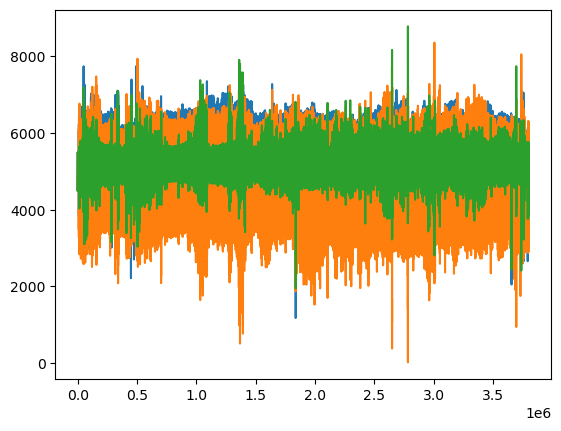

In [19]:
plt.plot(df['chan 1'], label='chan 1')
plt.plot(df['chan 2'], label='chan 2')
plt.plot(df['chan 3'], label='chan 3')

In [14]:
lifecard8 = mne.io.read_raw_edf("files/ucddb008_lifecard.edf")
lifecard8
# lifecard8.to_data_frame()

Extracting EDF parameters from /Users/xintong/Desktop/UMich/Classes/FA23/SI671/project/files/ucddb008_lifecard.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


Measurement date,"January 01, 2006 09:11:12 GMT"
Experimenter,Unknown
Participant,
Digitized points,Not available
Good channels,3 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,128.00 Hz
Highpass,0.00 Hz
Lowpass,64.00 Hz


it is suspected that there are more repeated data than clarified on the data description page. each patient has three channels of ECG recorded through out a sleep cycle that should have different readings from each other. 
There are a lot of zero readings at the end the sleep cycle, which should probably be imputed somehow. 
It is worth summarizing the time series data into one number and compare it with patient details. 
More research to be done with regards to the relationship between ECG readings and personal health data.

In [12]:
pd.read_excel("files/SubjectDetails.xls")

,S/No,Study Number,Height (cm),Weight (kg),Gender,PSG Start Time,PSG AHI,BMI,Age,Epworth Sleepiness Score,Study Duration (hr),Sleep Efficiency (%),Unnamed: 12,No of data blocks in EDF
0,1,UCDDB002,172,100.3,M,0:11:04,23,33.9,54,16,6.2,84,NaN,22470
1,2,UCDDB003,179,102.0,M,23:07:50,51,31.8,48,13,7.3,81,NaN,26478
2,3,UCDDB005,176,100.4,M,23:28:42,13,32.4,65,19,6.9,63,NaN,24798
3,4,UCDDB006,185,103.5,M,23:57:14,31,30.2,52,3,6.7,89,NaN,24267
4,5,UCDDB007,183,84.0,M,23:30:22,12,25.1,47,15,6.8,90,NaN,24405
5,6,UCDDB008,145,59.8,F,23:29:11,5,28.4,63,1,6.4,64,NaN,23041
6,7,UCDDB009,180,101.5,M,22:35:22,12,31.3,52,19,7.7,80,NaN,27759
7,8,UCDDB010,174,119.0,M,22:51:18,34,39.3,38,2,7.6,92,NaN,27211
8,9,UCDDB011,188,101.0,M,22:47:38,8,28.6,51,8,7.5,60,NaN,27030
9,10,UCDDB012,179,97.5,M,23:23:21,25,30.4,51,16,7.2,85,NaN,25941
